## Distribution coagulation
Now with particle number distribution we can calculated the coagulation rate, both the loss and gain in particle number. Let's import the classes from the previous tutorial and make a new coarse distribution.

In [ ]:
try:
    import particula, matplotlib
except ImportError:
    print("Setting up computational environment...")
    %pip install -U particula -qqq
    %pip install matplotlib -qqq


from particula import particle, rates
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
coarse_mode = {
    "mode": 2000e-9, # 200 nm median
    "nbins": 1000, # 1000 bins
    "nparticles": 1e5, # 1e4 #
    "volume": 1e-6, # per 1e-6 m^3 (or 1 cc)
    "gsigma": 1.4, # relatively narrow
    "spacing": "linspace", # bin spacing, 
}

In [12]:
coarse_mode_dist = particle.Particle(**coarse_mode)
coarse_coag_loss = rates.Rates(particle=coarse_mode_dist).coagulation_loss()
coarse_coag_gain = rates.Rates(particle=coarse_mode_dist).coagulation_gain()

Then plotting the results, we see that smaller particles are lost and larger particles gain number

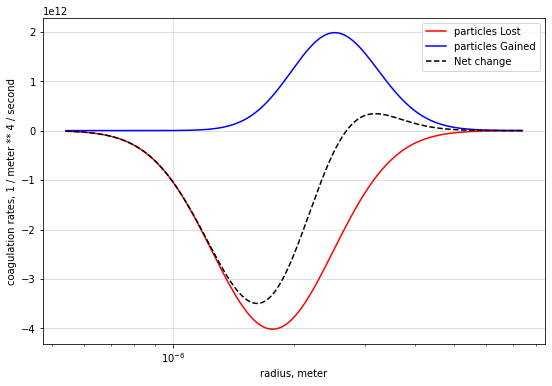

In [13]:
fig, ax = plt.subplots(1, 1, figsize=[9, 6])

# (2*(peak of original distribution)**3)**(1/3)

ax.semilogx(coarse_mode_dist.particle_radius.m, -coarse_coag_loss.m, '-r', label='particles Lost')
ax.semilogx(coarse_mode_dist.particle_radius.m, coarse_coag_gain.m, '-b', label='particles Gained')
ax.semilogx(coarse_mode_dist.particle_radius.m, coarse_coag_gain.m-coarse_coag_loss.m, '--k', label= 'Net change')
ax.legend()
ax.set_xlabel(f"radius, {coarse_mode_dist.particle_radius.u}")
ax.set_ylabel(f"coagulation rates, {coarse_coag_gain.u}")
ax.grid(True, alpha=0.5)